In [1]:
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [2]:
prova = pd.read_csv("adult.data", sep=",")
prova

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## *Preprocessing* : the column labels are not consistent with the features declared in the "adult.names" file 
 * In that case it could be helpful the "header" parameter of the read_csv method

In [3]:
indexes = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", \
          "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", \
           "native-country", "income"]

In [4]:
dataset = pd.read_csv("adult.data", sep=",", header = None, names=indexes)
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Now that the headers are correct we can move on to the *Data Cleaning* phase

* Check if there are Nan values

In [5]:
dataset.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

* Check for duplicates

In [6]:
dataset.duplicated().any()

True

In [7]:
dataset.drop_duplicates(inplace=True)

In [8]:
print(str(len(dataset.columns))+" columns")
print(str(len(dataset))+" rows")

15 columns
32537 rows


## Since the dataset has already been altered, from the adult.names file we know of the presence of "?" values, used to replace the "Unknown" value, so let's remove the lines containing the value ?

In [9]:
dataset.isin([" ?"]).any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
income            False
dtype: bool

In [10]:
for column in dataset.columns:
    index_to_delete = dataset[ dataset[column] == ' ?'].index
    dataset.drop(index_to_delete,inplace=True)

In [11]:
dataset.reset_index(inplace=True, drop=True)

* The "?" values are successfully removed

In [12]:
print("The number of rows is", len(dataset))
print("Number of rows with capital-gain equal to 0:", len(dataset[dataset['capital-gain'] == 0]))
print("Number of rows with capital-loss equal to 0:", len(dataset[dataset['capital-loss'] == 0]))

The number of rows is 30139
Number of rows with capital-gain equal to 0: 27601
Number of rows with capital-loss equal to 0: 28712


### We remove the capital-gain and capital-loss columns because they do not provide useful information (most rows have value 0)

In [13]:
dataset.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)

In [14]:
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
30135,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
30136,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
30137,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


## Descriptive Analytics
### We analyze with a bar plot each feature compared with the income 

In [15]:
# 
# index_col: the feature that we want to plot
# big: we use it only when the feature has many unique values and we want a more readable plot
#
def bar_plot_feature(index_col, big=False):
            
    frame = dataset.pivot_table(index=index_col, values='age',  \
                                columns='income', aggfunc='count', fill_value=0)
    
    frame['%_<='] = (frame[' <=50K'] / (frame[' <=50K'] + frame[' >50K']) ).round(2)
    frame['%_>'] = (frame[' >50K'] / (frame[' <=50K'] + frame[' >50K']) ).round(2)
    
    display(frame)
    
    if(big):
        frame.loc[:,'%_<=':'%_>'].plot.barh(figsize=(10,10))
    else:
        frame.loc[:,'%_<=':'%_>'].plot.barh()

income,<=50K,>50K,%_<=,%_>
workclass,,,,
Federal-gov,578,365,0.61,0.39
Local-gov,1458,609,0.71,0.29
Private,17390,4874,0.78,0.22
Self-emp-inc,474,600,0.44,0.56
Self-emp-not-inc,1784,714,0.71,0.29
State-gov,935,344,0.73,0.27
Without-pay,14,0,1.00,0.00


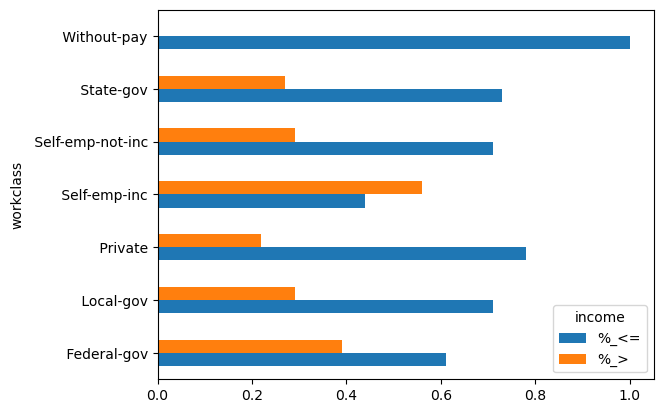

In [16]:
bar_plot_feature('workclass')

In [ ]:
bar_plot_feature('education')

In [ ]:
bar_plot_feature('marital-status')

In [ ]:
bar_plot_feature('occupation')

In [ ]:
bar_plot_feature('relationship')

In [ ]:
bar_plot_feature('race')

In [ ]:
bar_plot_feature('sex')

In [ ]:
bar_plot_feature('native-country', big=True)

In [ ]:
# we create groups of 10 year 

dataset['ten_year'] = dataset['age']//10
for i in dataset.index:
    dataset.loc[i,'ten_year'] = str(dataset.loc[i,'ten_year'])+'0-'+str(dataset.loc[i,'ten_year'] + 1)+'0'
dataset

bar_plot_feature('ten_year')

In [ ]:
# we delete the new added column
dataset.drop('ten_year',axis=1,inplace=True)
dataset

In [ ]:
# we create group of 5 hours 

dataset['hours'] = dataset['hours-per-week']//5
for i in dataset.index:
    dataset.loc[i,'hours'] = str(dataset.loc[i,'hours'] * 5)+'-'+str(dataset.loc[i,'hours'] * 5 + 5)
dataset

bar_plot_feature('hours', big=True)

#### Notice that since the groups of hours are listed in lexicographically order, the group "5-10" is listed after the group "45-50". 

In [ ]:
# we delete the new added column
dataset.drop('hours',axis=1,inplace=True)
dataset

## We prepare the dataset for the prediction model

### The values of the "income" are replaced with 0 and 1 (being a binary value)

In [17]:
dataset.replace({'income': '<=50K'}, value=0, regex=True, inplace=True)
dataset.replace({'income': '>50K'}, value=1, regex=True, inplace=True)
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0
30135,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1
30136,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0
30137,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0


### The values of the "sex" are replaced with 0 and 1 (being a binary value)

In [18]:
dataset.replace({'sex': 'Male'}, value=0, regex=True, inplace=True)
dataset.replace({'sex': 'Female'}, value=1, regex=True, inplace=True)
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,1,38,United-States,0
30135,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,40,United-States,1
30136,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,1,40,United-States,0
30137,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,20,United-States,0


In [19]:
print(dataset['education'].unique())
print(dataset['education-num'].unique())

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
[13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]


### Since "education" has associated the column "education-num" we delete the former and we keep the latter, which is numerical and respects the order

### We delete also the "fnlwgt" (final weight) column because it does not provide useful information for our goal 

In [20]:
dataset.drop(['fnlwgt','education'], axis=1, inplace=True)
dataset

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...
30134,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,1,38,United-States,0
30135,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,40,United-States,1
30136,58,Private,9,Widowed,Adm-clerical,Unmarried,White,1,40,United-States,0
30137,22,Private,9,Never-married,Adm-clerical,Own-child,White,0,20,United-States,0


### We apply OneHotEncoder method on categorical-data columns

In [21]:
def Encoding(columnName, dataset):
    a = dataset[columnName].unique()
    a.sort()

    #colonne = dataset.columns
    encoder = OneHotEncoder(handle_unknown='ignore')
    encoder_df = pd.DataFrame(encoder.fit_transform(dataset[[columnName]]).astype(int).toarray())
    
    diz = {i:columnName+'( '+el+' )' for i,el in enumerate(a)}
        
    dataset2 = dataset.join(encoder_df)
    dataset2.drop(columnName, axis=1, inplace=True)
    dataset2.rename(columns=diz, inplace=True)
    return dataset2

In [22]:
datatypes = dataset.dtypes
columnNames = dataset.columns
for i,el in enumerate(datatypes):
    if el == "object":
        dataset = Encoding(columnNames[i], dataset)
dataset

,age,education-num,sex,hours-per-week,income,workclass( Federal-gov ),workclass( Local-gov ),workclass( Private ),workclass( Self-emp-inc ),workclass( Self-emp-not-inc ),...,native-country( Portugal ),native-country( Puerto-Rico ),native-country( Scotland ),native-country( South ),native-country( Taiwan ),native-country( Thailand ),native-country( Trinadad&Tobago ),native-country( United-States ),native-country( Vietnam ),native-country( Yugoslavia )
0,39,13,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,13,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,1,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,27,12,1,38,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30135,40,9,0,40,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30136,58,9,1,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30137,22,9,0,20,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
for column in dataset.columns:
    print(column)

In [23]:
scaler = MinMaxScaler() 

for c in dataset.columns:
    dataset[[c]] = scaler.fit_transform(dataset[[c]])
dataset


,age,education-num,sex,hours-per-week,income,workclass( Federal-gov ),workclass( Local-gov ),workclass( Private ),workclass( Self-emp-inc ),workclass( Self-emp-not-inc ),...,native-country( Portugal ),native-country( Puerto-Rico ),native-country( Scotland ),native-country( South ),native-country( Taiwan ),native-country( Thailand ),native-country( Trinadad&Tobago ),native-country( United-States ),native-country( Vietnam ),native-country( Yugoslavia )
0,0.301370,0.800000,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.800000,0.0,0.122449,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.533333,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.400000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.800000,1.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,0.136986,0.733333,1.0,0.377551,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30135,0.315068,0.533333,0.0,0.397959,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30136,0.561644,0.533333,1.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30137,0.068493,0.533333,0.0,0.193878,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
from sklearn.neural_network import MLPClassifier



In [25]:
# Move income column to the end 

old_columns = dataset.columns.tolist()

index = dataset.columns.get_loc("income")

new_columns = old_columns[0:index] + old_columns[index+1:] + old_columns[index:index+1]

dataset = dataset[new_columns]
dataset

,age,education-num,sex,hours-per-week,workclass( Federal-gov ),workclass( Local-gov ),workclass( Private ),workclass( Self-emp-inc ),workclass( Self-emp-not-inc ),workclass( State-gov ),...,native-country( Puerto-Rico ),native-country( Scotland ),native-country( South ),native-country( Taiwan ),native-country( Thailand ),native-country( Trinadad&Tobago ),native-country( United-States ),native-country( Vietnam ),native-country( Yugoslavia ),income
0,0.301370,0.800000,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.452055,0.800000,0.0,0.122449,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.287671,0.533333,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.493151,0.400000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.150685,0.800000,1.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,0.136986,0.733333,1.0,0.377551,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30135,0.315068,0.533333,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
30136,0.561644,0.533333,1.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30137,0.068493,0.533333,0.0,0.193878,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
# X_train contains the predictive variables and Y_train contains the target variable (the income)
X_train = dataset.iloc[:,0:-1].values
Y_train = dataset.iloc[:,-1].values

In [ ]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import time


model = MLPClassifier()

param_grid = {
    'hidden_layer_sizes': [(5, 5), (10, 10), (20, 20)],
    'max_iter': [400, 500]
}

scoring = 'accuracy'

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring)

start_time = time.time()

grid_search.fit(X_train, Y_train)   


print("Minutes:", (time.time() - start_time) // 60 )
print("Best combination of parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# cose che avevo fatto a mano prima di pensare a grid search

# con 10 10 10 -> prestazioni medie 0.832 tempo 120 secondi --> 2 min
# con 100 100 100 -> prestazioni medie 0.809 tempo 555 secondi --> 9 min 
# con 150 100 100 -> prestazioni medie 0.810 tempo 547 secondi --> 9 min
# con 150 150 100 -> prestazioni medie 0.805 tempo 609 secondi --> 10 min

import pickle

model = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=400)
model.fit(X_train, Y_train)

filename = 'Classificatore.sav'
pickle.dump(model, open(filename,'wb'))
'''

In [27]:

# |1x3 Cross validator
def data_cleaning(dataset):
    
    dataset.dropna(inplace=True)
    dataset.drop_duplicates(inplace=True)
    
    for column in dataset.columns:
        index_to_delete = dataset[ dataset[column] == ' ?'].index
        dataset.drop(index_to_delete,inplace=True)
    dataset.reset_index(inplace=True, drop=True)
    
    dataset.drop(['capital-gain', 'capital-loss', 'fnlwgt','education'], axis=1, inplace=True)
    
    return dataset

def data_preprocessing(dataset):
    
    dataset.replace({'income': '<=50K'}, value=0, regex=True, inplace=True)
    dataset.replace({'income': '>50K'}, value=1, regex=True, inplace=True)

    dataset.replace({'sex': 'Male'}, value=0, regex=True, inplace=True)
    dataset.replace({'sex': 'Female'}, value=1, regex=True, inplace=True)

    datatypes = dataset.dtypes
    columnNames = dataset.columns
    for i,el in enumerate(datatypes):
        if el == "object":
            dataset = Encoding(columnNames[i], dataset)
    
    scaler = MinMaxScaler() 

    for c in dataset.columns:
        dataset[[c]] = scaler.fit_transform(dataset[[c]])
    
    # Move income column to the end 

    old_columns = dataset.columns.tolist()
    index = dataset.columns.get_loc("income")
    new_columns = old_columns[0:index] + old_columns[index+1:] + old_columns[index:index+1]
    dataset = dataset[new_columns]
    
    return dataset   

In [51]:
def add_shift_column(name, index, dataset):
    
    dataset[name] = 0.0

    col = dataset.pop(name)
    dataset.insert(index, col.name, col)
    
    return dataset
    


In [54]:
testing_data = pd.read_csv('adult.test', sep=',', header=None, names=indexes)


testing_data = data_cleaning(testing_data)

testing_data = data_preprocessing(testing_data) 
testing_data

,age,education-num,sex,hours-per-week,workclass( Federal-gov ),workclass( Local-gov ),workclass( Private ),workclass( Self-emp-inc ),workclass( Self-emp-not-inc ),workclass( State-gov ),...,native-country( Puerto-Rico ),native-country( Scotland ),native-country( South ),native-country( Taiwan ),native-country( Thailand ),native-country( Trinadad&Tobago ),native-country( United-States ),native-country( Vietnam ),native-country( Yugoslavia ),income
0,0.109589,0.400000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.287671,0.533333,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.150685,0.733333,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.369863,0.600000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.232877,0.333333,0.0,0.295918,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15050,0.219178,0.800000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15051,0.301370,0.800000,1.0,0.357143,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15052,0.287671,0.800000,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15053,0.369863,0.800000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [55]:
for i,c in enumerate(dataset.columns):
    t = False
    for c1 in testing_data.columns:
        if(c == c1):
            t = True
    if(t == False):
        testing_data = add_shift_column(c, i, testing_data)
        
        
testing_data

,age,education-num,sex,hours-per-week,workclass( Federal-gov ),workclass( Local-gov ),workclass( Private ),workclass( Self-emp-inc ),workclass( Self-emp-not-inc ),workclass( State-gov ),...,native-country( Puerto-Rico ),native-country( Scotland ),native-country( South ),native-country( Taiwan ),native-country( Thailand ),native-country( Trinadad&Tobago ),native-country( United-States ),native-country( Vietnam ),native-country( Yugoslavia ),income
0,0.109589,0.400000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.287671,0.533333,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.150685,0.733333,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.369863,0.600000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.232877,0.333333,0.0,0.295918,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15050,0.219178,0.800000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15051,0.301370,0.800000,1.0,0.357143,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15052,0.287671,0.800000,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15053,0.369863,0.800000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [64]:
X_train = dataset.iloc[:,0:-1].values
Y_train = dataset.iloc[:,-1].values

model = MLPClassifier(hidden_layer_sizes=(35,25,15), max_iter=400, random_state=1)
model.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(35, 25, 15), max_iter=400, random_state=1)

In [60]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    
    return diagonal_sum / sum_of_all_elements

In [65]:
X_val = testing_data.iloc[:,0:-1].values
y_val = testing_data.iloc[:,-1].values

y_pred = model.predict(X_val)

from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_val)

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.8168050481567586


In [66]:
import time


model = MLPClassifier()

param_grid = {
    'hidden_layer_sizes': [(50, 35, 15), (40, 20, 10), (35, 25, 10), (20, 10, 5)],
    'max_iter': [400, 500],
    'random_state': [1]
}

scoring = 'accuracy'

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring)

start_time = time.time()

grid_search.fit(X_train, Y_train)   


print("Minutes:", (time.time() - start_time) // 60 )
print("Best combination of parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

/Users/katiusciapellone/opt/anaconda3/envs/data_analytics/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Minutes: 27.0
Best combination of parameters: {'hidden_layer_sizes': (20, 10, 5), 'max_iter': 400, 'random_state': 1}
Best score: 0.8304191853315688
